# 회귀를 이용한 예측: 차원축소

### PCA 기반 PCR 분석에 적합한 데이터셋은 어떤 특징을 가지고 있어야 하는가?
1. **설명변수 간의 다중공선성이 높은 데이터셋**
* 설명변수들 간의 상관관계가 높아서 선형회귀분석을 하면 문제가 발생하는 경우
* PCA를 통해 이렇게 높은 상관관계를 제거하고, 주성분으로 차원을 축소한 후 회귀분석을 수행할 수 있다.
2. **고차원 데이터셋 (Feature가 많은 경우)**
* 설명변수[Feature]의 수가 많아서 차원축소가 필요할 때
* 데이터의 차원이 너무 많으면 과적합(overfitting) 문제가 발생할 수 있으므로, PCA를 활용해 주성분만 선택할 수 있다.
3. **연속형 반응변수를 가진 데이터셋**
* 예측하려는 변수[반응변수]가 연속적인 값을 가진 경우

### PLS 분석에 적합한 데이터셋은 어떤 특징을 가지고 있어야 하는가?
1. **설명변수 간의 다중공선성이 높은 데이터셋**
* PLS는 설명변수들 간에 높은 상관관계(다중공선성)가 존재할 때 유용하다.
* 다중공선성이 심한 경우, 전통적 다중회귀에서는 회귀계수 추정이 불안정해질 수 있는데, PLS는 잠재 변수(components)를 통해 이러한 문제를 완화한다.
2. **고차원 데이터셋**
* 설명변수의 수(p)가 관측치의 수(n)보다 많거나, 두 수가 비슷한 경우에도 PLS는 효과적으로 작동한다.
* 고차원 상황에서 차원 축소와 예측력을 동시에 확보할 수 있는 장점이 있다.
3. **예측과 설명 모두에 관심**
* PLS는 X와 Y의 공분산 구조를 고려하여 잠재 변수를 추출하기 때문에, 예측력 뿐만 아니라 변수들 간의 관계(해석)를 동시에 살펴보고자 할 때 유리하다.
* 특히 다변량 반응변수(multivariate Y)를 다룰 때 유용하다.
4. **연속형 변수를 가진 데이터셋**
* 기본적인 PLS 분석은 연속형 데이터에 대해 적용된다.
* 만약 범주형 변수가 포함되어 있다면, 적절한 인코딩(예: 원-핫 인코딩)을 거친 후 적용해야 한다.
5. **데이터의 스케일 차이가 존재하는 경우**
* 설명변수와 반응변수 모두 서로 다른 단위나 범위를 가질 수 있기 때문에, 분석 전에 중심화 및 스케일링(정규화)을 수행하는 것이 일반적이다.
* 스케일링은 각 변수의 기여도를 균등하게 반영하게 하여, 잠재변수 추출이 왜곡되지 않도록 한다.
6. **노이즈와 이상치**
* PLS는 노이즈가 존재하는 데이터에서도 잠재변수 추출을 통해 신호를 잡아내는 데 유리하지만, 극단적인 이상치가 존재하면 모형에 영향을 줄 수 있으므로 사전에 이상치 처리가 필요하다.
7. **부분적 선형 관계**
* 기본 PLS 모형은 선형 관계를 가정한다.
* 따라서 X와 Y 간에 어느 정도 선형 혹은 선형으로 근사 가능한 관계가 존재하면, PLS가 효과적으로 작동한다.

### PCR 분석에 적합한 데이터셋의 예시
1. **Boston Housing Dataset**
2. **California Housing Dataset**
3. **Wine Quality Dataset**
4. **Energy Efficiency Dataset(건물 에너지 효율 예측)**
- https://archive.ics.uci.edu/dataset/242/energy+efficiency

### Energy Efficiency Dataset을 사용해 보자.

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"

In [3]:
df = pd.read_excel(url)   # [Q] pandas 라이브러리의 read_excel() 함수를 적용한 df의 type은 무엇일까?

In [4]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
print(df.shape)   # [Q] df에는 몇 개의 샘플과 변수가 있을까? 변수들을 Features와 target으로 구분해 보자.

(768, 10)


In [6]:
print(df.describe())   # [Q] Features: X1 ~ X8, Target Variables: Y1, Y2 ===> 각 변수는 무엇인가? 변수에 대한 설명이 필요하다.

               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
50%      0.750000  673.750000  318.500000  183.750000    5.25000    3.500000   
75%      0.830000  741.125000  343.000000  220.500000    7.00000    4.250000   
max      0.980000  808.500000  416.500000  220.500000    7.00000    5.000000   

               X7         X8          Y1          Y2  
count  768.000000  768.00000  768.000000  768.000000  
mean     0.234375    2.81250   22.307195   24.587760  
std      0.133221    1.55096   10.090204    9.513306  
min      0.000000    0.00000    6.010000   10.900000  
25% 

In [7]:
df.columns = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height",
              "Orientation", "Glazing Area", "Glazing Area Distribution", "Heating Load", "Cooling Load"]   # 변수명을 부여

In [8]:
print(df.head())

   Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing Area  Glazing Area Distribution  Heating Load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0                          0         20.84   

   Cooling Load  
0         21.33  
1         21.33  
2         21.33  
3         21.3

In [9]:
print(df.describe())   # 변수별 요약통계량을 확인해 보자.

       Relative Compactness  Surface Area   Wall Area   Roof Area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       Overall Height  Orientation  Glazing Area  Glazing Area Distribution  \
count       768.00000   768.000000    768.000000                  768.00000   
mean          5.25000     3.500000      0.234375                    2.81250   
std           1.75114     1.118763      0.133221                    1.55096   
min           3.50000     2.000000      0.000000              

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정: Windows의 경우 'Malgun Gothic' 사용
#plt.rcParams['font.family'] = 'Malgun Gothic'
# 음수 기호 깨짐 방지
#plt.rcParams['axes.unicode_minus'] = False

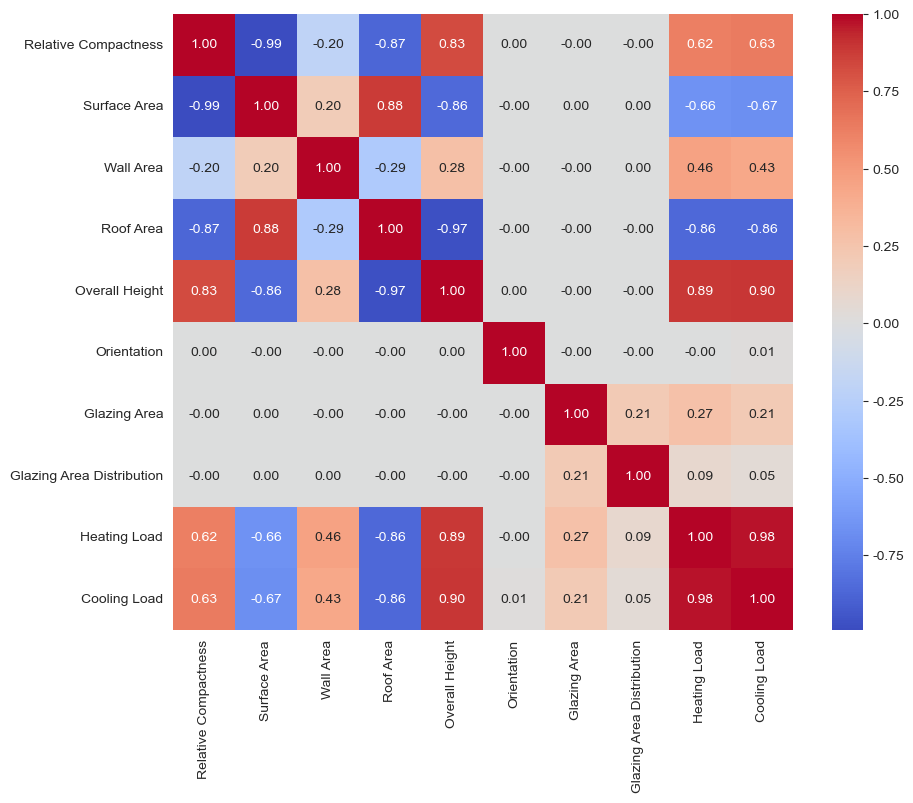

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

## PCA

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
# 독립 변수(X)와 종속 변수(Y) 분리
X = df.iloc[:, :-2]   # 마지막 두 열(Y1, Y2) 제외
y = df.iloc[:, -2]    # 난방 부하 (Heating Load) 예측

In [21]:
print(y.shape, y.ndim)

(768,) 1


In [22]:
Y = y.values.reshape(-1, 1)

In [23]:
print(Y.shape, Y.ndim)

(768, 1) 2


In [26]:
# 데이터 스케일링 (PCA는 변수 크기에 민감하므로 표준화 필요)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)   # 반응변수 y에 대한 정규화는 PCA와 PCR 분석에서는 필요하지 않지만, PLS 분석을 위해 미리 해둔다.

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca_full = PCA()                                # 8개 components 모두를 대상으로 PCA 분석을 수행하는 경우
X_pca_full = pca_full.fit_transform(X_scaled)

In [29]:
# 각 주성분이 설명하는 분산 비율 계산
explained_variance_full = pca_full.explained_variance_ratio_
cumulative_variance_full = np.cumsum(explained_variance_full)

In [30]:
print(explained_variance_full)

[0.46286741 0.15498141 0.15162053 0.125      0.09837947 0.00659424
 0.00055694 0.        ]


In [31]:
print(cumulative_variance_full)

[0.46286741 0.61784882 0.76946935 0.89446935 0.99284882 0.99944306
 1.         1.        ]


In [32]:
# 주성분별 설명된 분산 출력
for i, (ev, cum_ev) in enumerate(zip(explained_variance_full, cumulative_variance_full), start=1):
    print(f"Principal Component {i}: 설명된 분산 비율 = {ev:.4f}, 누적 = {cum_ev:.4f}")

# enumerate()의 start 옵션: 반환되는 인덱스의 시작값을 지정하는 역할

Principal Component 1: 설명된 분산 비율 = 0.4629, 누적 = 0.4629
Principal Component 2: 설명된 분산 비율 = 0.1550, 누적 = 0.6178
Principal Component 3: 설명된 분산 비율 = 0.1516, 누적 = 0.7695
Principal Component 4: 설명된 분산 비율 = 0.1250, 누적 = 0.8945
Principal Component 5: 설명된 분산 비율 = 0.0984, 누적 = 0.9928
Principal Component 6: 설명된 분산 비율 = 0.0066, 누적 = 0.9994
Principal Component 7: 설명된 분산 비율 = 0.0006, 누적 = 1.0000
Principal Component 8: 설명된 분산 비율 = 0.0000, 누적 = 1.0000


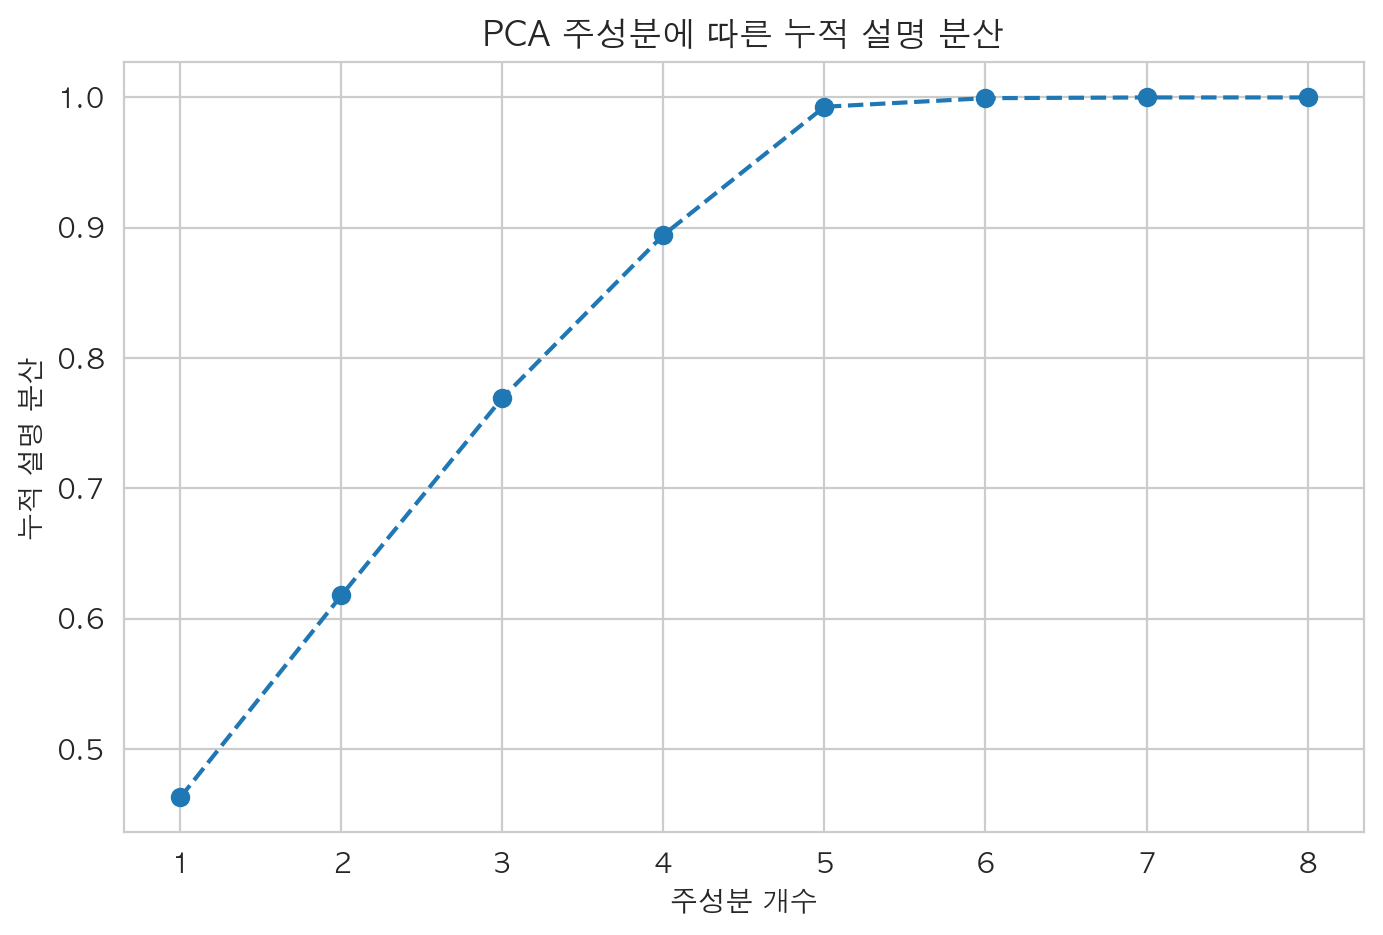

In [40]:
# 누적 설명된 분산 시각화
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
plt.rc('font', family='AppleGothic')
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance_full)+1), cumulative_variance_full, marker='o', linestyle='--')
plt.xlabel('주성분 개수')
plt.ylabel('누적 설명 분산')
plt.title('PCA 주성분에 따른 누적 설명 분산')
plt.grid(True)
plt.show()

In [34]:
# 8개의 주성분 중, 설명력을 95% 이상 유지하는 차원 선택
pca_95 = PCA(n_components=0.95)   # 누적 설명 분산 비율이 95% 이상이 되도록 자동 선택
X_pca = pca_95.fit_transform(X_scaled)

In [35]:
# 주성분 개수 확인
print(f"선택된 주성분 개수: {pca_95.n_components_}")

선택된 주성분 개수: 5


## PCR

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
# 데이터셋 분할
'''
PCR에서는 y는 새삥, X는 정규화+PCA 주성분으로 된 놈으로 조진다.
'''
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [52]:
# 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [53]:
# 예측 및 성능 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [54]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score : {r2:.2f}")

Mean Squared Error (MSE): 13.54
R2 Score : 0.87


## PLS

In [55]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cross_decomposition import PLSRegression

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)

In [57]:
X_train.shape

(614, 8)

In [58]:
X_train.shape[1]

8

In [59]:
# 최적의 PLS 주성분(n_components) 선택을 위한 교차 검증
# 가능한 주성분 개수는 1부터 설명변수 개수(여기서는 8)까지 고려합니다.
mse_cv = []
n_components_range = range(1, X_train.shape[1] + 1)

In [60]:
print(n_components_range[0], n_components_range[-1])

1 8


In [61]:
for n in n_components_range:
    pls_temp = PLSRegression(n_components=n)
    # 10-Fold Cross-Validation에서 음의 평균 제곱 오차를 구한다
    scores = cross_val_score(pls_temp, X_train, Y_train, cv=10, scoring="neg_mean_squared_error")
    mse_cv.append(-np.mean(scores))
    print(f"n_components = {n}, 교차 검증 MSE = {-np.mean(scores):.4f}")

n_components = 1, 교차 검증 MSE = 0.2280
n_components = 2, 교차 검증 MSE = 0.1150
n_components = 3, 교차 검증 MSE = 0.1082
n_components = 4, 교차 검증 MSE = 0.0912
n_components = 5, 교차 검증 MSE = 0.0853
n_components = 6, 교차 검증 MSE = 0.0853
n_components = 7, 교차 검증 MSE = 0.0844
n_components = 8, 교차 검증 MSE = 180.0189


In [39]:
mse_cv

[0.228049432677517,
 0.11495258724669699,
 0.1081863286934766,
 0.09120105517728797,
 0.08533567645649179,
 0.08530772426111723,
 0.0843731911744683,
 129.01860438884222]

In [40]:
np.argmin(mse_cv)

6

In [62]:
# 최적의 주성분 개수 선택 (MSE가 최소일 때)
optimal_n = np.argmin(mse_cv) + 1
print("\n최적의 주성분 개수:", optimal_n)


최적의 주성분 개수: 7


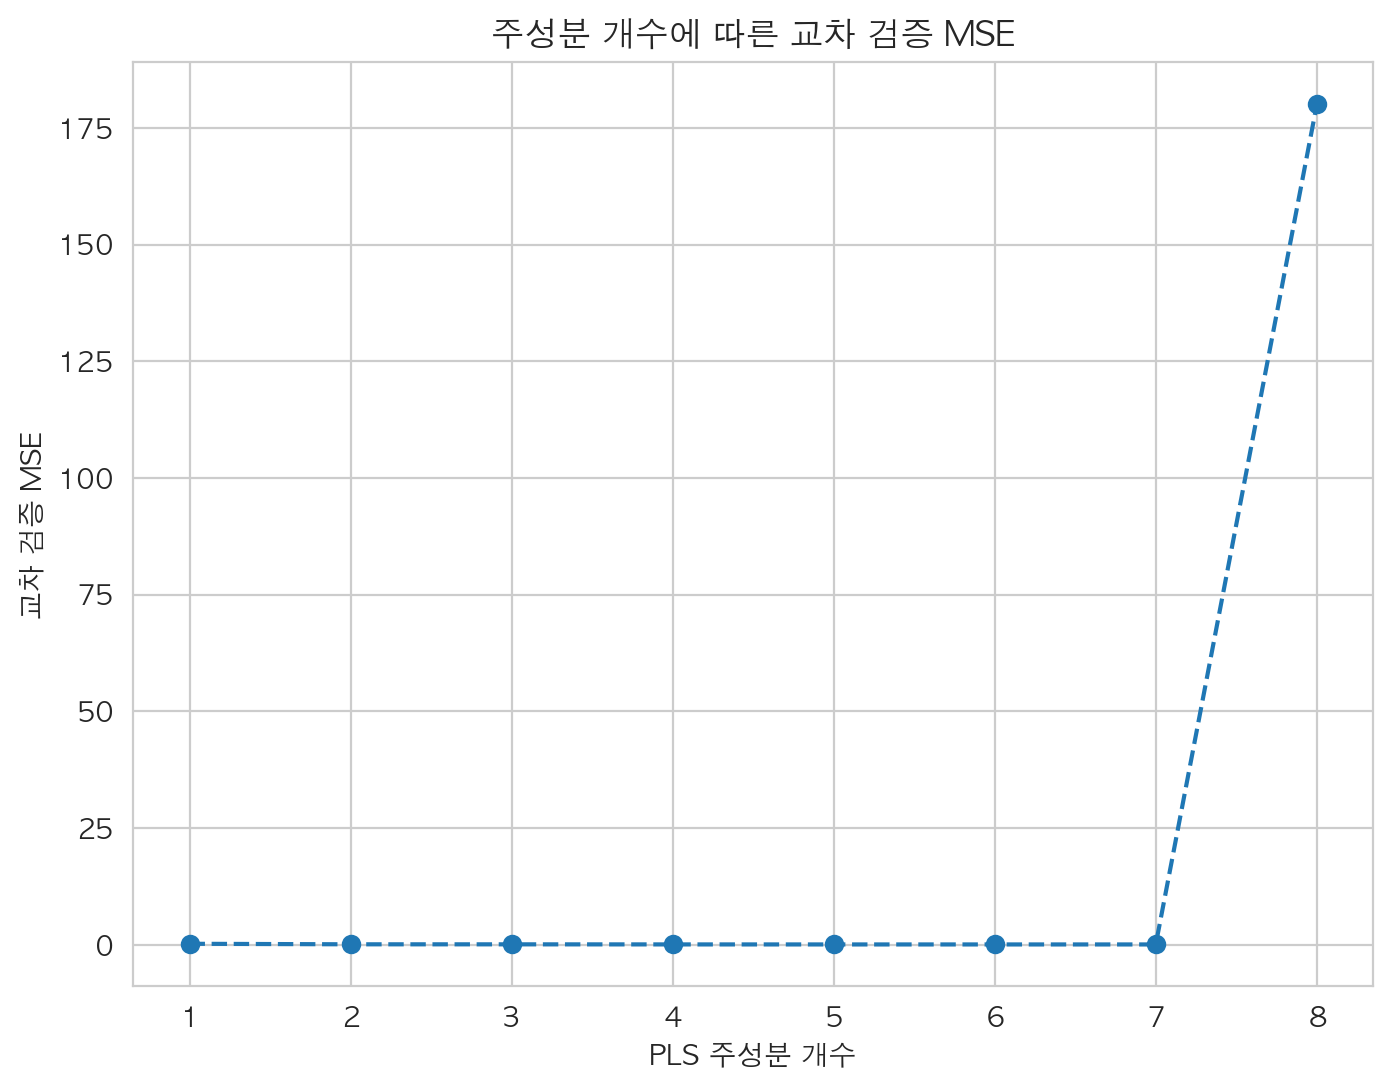

In [63]:
# 주성분 개수에 따른 교차 검증 MSE 시각화
plt.figure(figsize=(8,6))
plt.plot(n_components_range, mse_cv, marker='o', linestyle='--')
plt.xlabel('PLS 주성분 개수')
plt.ylabel('교차 검증 MSE')
plt.title('주성분 개수에 따른 교차 검증 MSE')
plt.grid(True)
plt.show()

In [64]:
# 최적의 주성분 개수를 사용하여 PLS 회귀 모델 학습
pls_opt = PLSRegression(n_components=optimal_n)
pls_opt.fit(X_train, Y_train)

PLSRegression(n_components=np.int64(7))

In [65]:
# 테스트 데이터셋에 대한 예측 및 평가
Y_pred_opt = pls_opt.predict(X_test)
mse_test = mean_squared_error(Y_test, Y_pred_opt)
r2_test = r2_score(Y_test, Y_pred_opt)

In [66]:
print("\nPLS 회귀 모델 성능 (최적 주성분 사용):")
print("테스트 MSE:", mse_test)
print("테스트 R2 Score:", r2_test)


PLS 회귀 모델 성능 (최적 주성분 사용):
테스트 MSE: 0.09002005623211332
테스트 R2 Score: 0.9121846294352438


In [67]:
# PLS 회귀 모델 구축 및 학습
# n_components는 사용할 주성분의 수입니다. (여기서는 2개로 설정)
pls_2 = PLSRegression(n_components=2)
pls_2.fit(X_train, Y_train)

PLSRegression()

In [68]:
# 테스트 데이터셋에 대한 예측
Y_pred_2 = pls_2.predict(X_test)

In [69]:
# 모델 평가 (MSE와 R2 Score)
mse = mean_squared_error(Y_test, Y_pred_2)
r2 = r2_score(Y_test, Y_pred_2)

In [70]:
print("PLS 회귀 모델 성능:")
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

PLS 회귀 모델 성능:
Mean Squared Error (MSE): 0.1285450543038275
R2 Score: 0.8746031490043614
